In [ ]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt 

In [ ]:
def displayImage(img):
  """
  Function to display image.
  Input: Image
  Output: Plot of Image.
  """
  plt.imshow(img, cmap='gray')
  plt.xticks([])
  plt.yticks([])

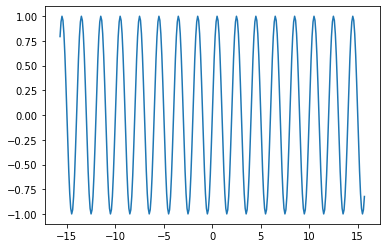

In [ ]:
# Function to generate sin wave.
def generate_sine_wave(freq):
  x = np.arange(-5*np.pi, 5*np.pi, 0.1)
  frequencies = x * freq
  # 2pi because np.sin takes radians
  y = np.sin((2 * np.pi) * frequencies)
  return x, y

x, y = generate_sine_wave(0.5)
plt.plot(x, y)
plt.show()

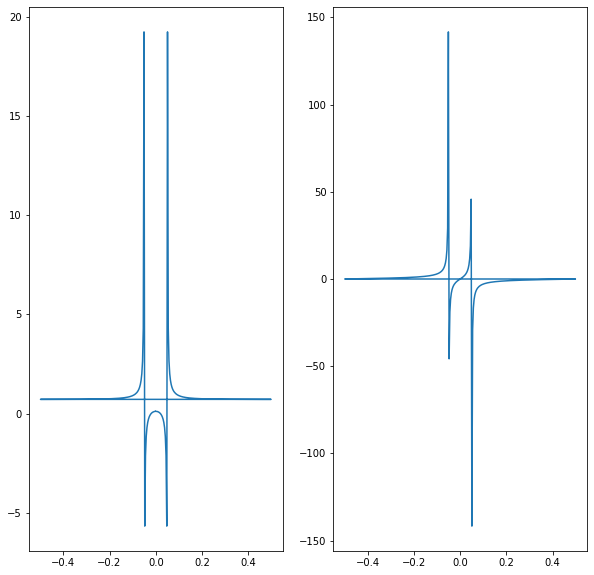

In [ ]:
sin_fft = np.fft.fft(y)
freq = np.fft.fftfreq(x.shape[-1])

plt.figure(figsize=(10, 10))
plt.subplot(1,2,1)
plt.plot(freq, sin_fft.real)

plt.subplot(1,2,2)
plt.plot(freq, sin_fft.imag)

plt.show()

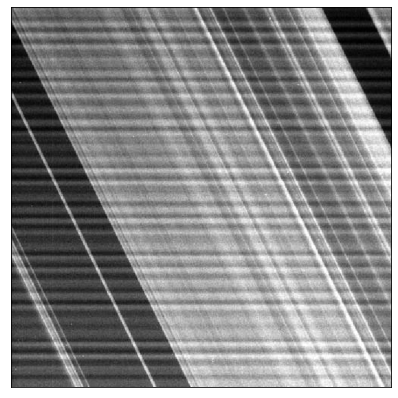

In [ ]:
img = cv.imread('cassini.tif',0)
row, col = img.shape
plt.figure(figsize=(7,7))
displayImage(img)
plt.show()

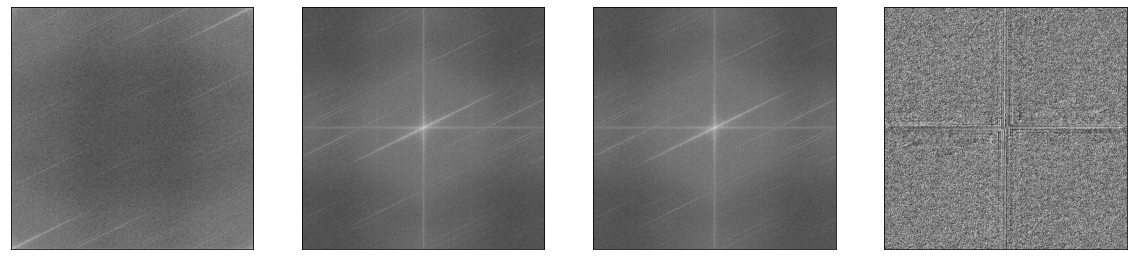

In [ ]:
plt.figure(figsize=(20,20))

# Fourier Transform
img_fft = np.fft.fft2(img)
plt.subplot(1, 4, 1)
displayImage(np.log1p(abs(np.real(img_fft))))

# Shifted Fourier Transform
img_sftd_fft = np.fft.fftshift(img_fft)
plt.subplot(1, 4, 2)
displayImage(np.log1p(abs(img_sftd_fft)))

# Power Spectrum
img_pwr_spc = abs(img_sftd_fft)**2
plt.subplot(1, 4, 3)
displayImage(np.log1p(img_pwr_spc))

# Phase Angle
img_phs_ang = np.angle(img_sftd_fft)
plt.subplot(1, 4, 4)
displayImage(img_phs_ang)

plt.show()

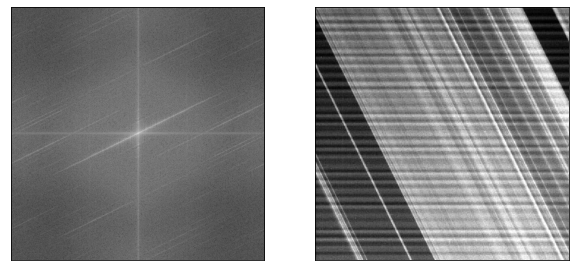

In [ ]:
plt.figure(figsize=(10,10))

plt.subplot(1, 2, 1)
displayImage(np.log1p(abs(img_sftd_fft)))

ifft = np.real(np.fft.ifft2(np.fft.ifftshift(img_sftd_fft)))
plt.subplot(1, 2, 2)
displayImage(ifft)

plt.show()